In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
from mypackages.eRDF import *
from tqdm import tqdm 
from mypackages.edp_processing import peak_calibration

from matplotlib import rcParams, cycler
from matplotlib.ticker import AutoMinorLocator

from mypackages.plot_style import set_plot_style

set_plot_style()

C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:246: SyntaxWarning: invalid escape sequence '\A'
  ax[0].set_xlabel("Q ($\AA^{-1}$)")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:252: SyntaxWarning: invalid escape sequence '\p'
  ax[1].plot(self.q, fq, label="$\phi(Q)$")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:253: SyntaxWarning: invalid escape sequence '\A'
  ax[1].set_xlabel("Q ($\AA^{-1}$)")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:254: SyntaxWarning: invalid escape sequence '\p'
  ax[1].set_ylabel("$\phi(Q)$")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:255: SyntaxWarning: invalid escape sequence '\p'
  ax[1].set_title("Calculating $\phi(Q)$")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:261: SyntaxWarning: invalid escape sequence '\A'
  ax[2].set_xlabel("r ($\AA$)")


The calculated calibration factor ds: 0.00743649587727647


<function matplotlib.pyplot.show(close=None, block=None)>

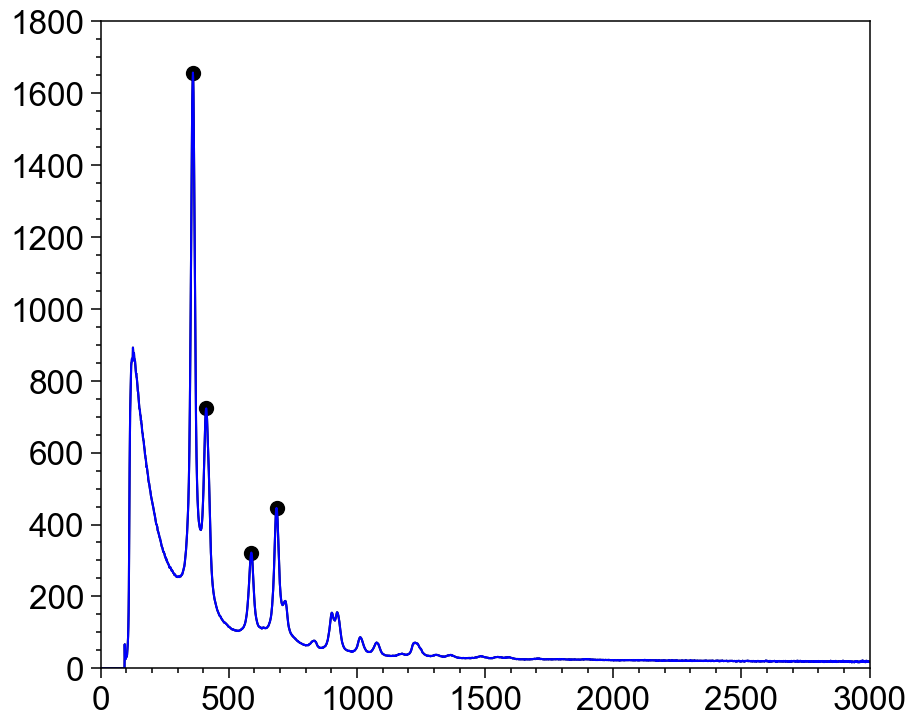

In [ ]:
#gold peak calibration
from scipy.signal import find_peaks

path = rC:\Users\seccolev\data_processing\data\processed\ePDF\Au\20250716"

start_name = 'Au_rolling.csv'

df1 = pd.read_csv(os.path.join(path, start_name), header = None)
#df2 = pd.read_csv(os.path.join(path, end_name), header = None)

data_start = df1[0].mean(axis=1)
#data_end = df2[0].values

peaks_start, _ = find_peaks(data_start, distance = 40, height=300)
#peaks_end, _ = find_peaks(data_end, distance = 40, height=500)



calibration = peak_calibration(pixel_positions = peaks_start[3:7])
#calibration_end = peak_calibration(pixel_positions = peaks_end[1:5])

#calibration = (calibration_start +calibration_end)/2

#peaks_end, _ = find_peaks(data_end, distance = 1, height=500)

plt.plot(data_start)
plt.plot(df1[0].values)
plt.scatter(peaks_start[3:7], data_start[peaks_start[3:7]])
plt.show


The calculated calibration factor ds: 0.012884624587976502


<function matplotlib.pyplot.show(close=None, block=None)>

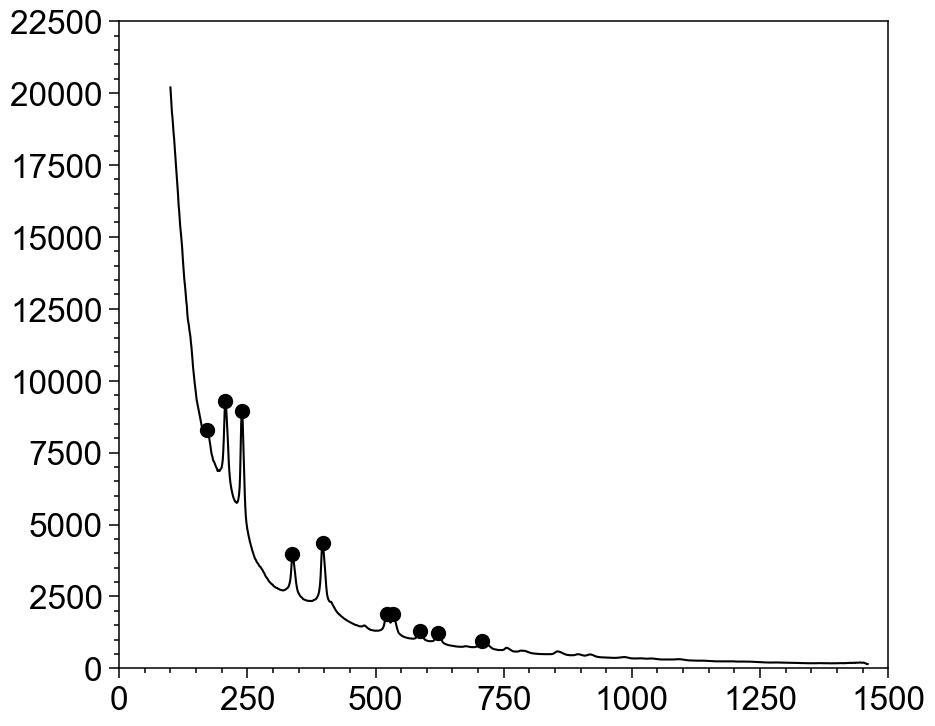

In [14]:
from scipy.signal import find_peaks


start_name = r"C:\Users\seccolev\data_processing\data\processed\ePDF\Au\20250716\Au_cds.csv"

df1 = pd.read_csv(start_name, header = None)


start =100
data = df1.mean(axis=1)[start:]

peaks_start, _ = find_peaks(data, distance = 10, height=200, prominence=100)

calibrate = True
sub = True

if calibrate:
    if sub:
        indices = [1,2,3,4] 
        subset = [peaks_start[i] for i in indices]
        subset = np.array(subset)
        calibration = peak_calibration(pixel_positions = subset+start, standard="gold")
    else:
        calibration = peak_calibration(pixel_positions = peaks_start+start, standard="gold")

plt.plot(data)
plt.scatter(peaks_start+start, data[peaks_start+start])
plt.show

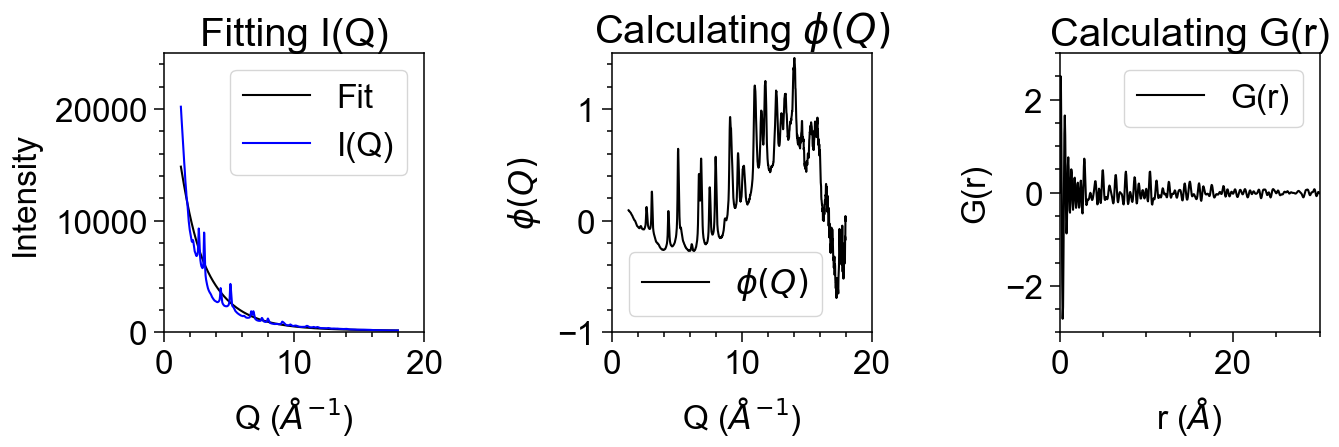

np.float64(17.986200419479808)

In [27]:
#df1 = pd.read_csv(start_name, header = None)

ds = (0.012838115931106215)/(2*math.pi) #AuNPs

df1 = pd.read_csv(start_name, header = None)

data = df1.mean(axis=1)

CdSe =  {1: [30, 1], 2: [8, 1],}
Magnetite = {'Fe': [28, 2], 'O': [8, 3],}

start = 100
qmax =18 
end = int(qmax / (ds * 2 * math.pi))

end = min(end, data.shape[-1])

dp1 = DataProcessor(data = data, q0=0, lobato_path= None, start= start, end = end, ds = ds, Elements = Magnetite, region = 0)
 

sq, fq = dp1.SQ_PhiQ(dp1.iq, 0)
r, Gr = dp1.Gr(fq, rmax=80, dr=0.05)


dp1.plot_results(fq, r, Gr0=Gr)
dp1.q.max()


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt



# Normalize the data
norm_data = data[start:end] / (dp1.N * dp1.fq_sq)
norm_data = norm_data * dp1.q

degree = 8
# Fit the polynomial
coefficients = np.polyfit(dp1.q, norm_data, degree)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting the polynomial fit
x_fit = np.linspace(dp1.q.min(), dp1.q.max(), len(norm_data))
y_fit = polynomial(x_fit)

# Calculate _fq_poly and apply Butterworth lowpass filter
fq_poly = norm_data - y_fit


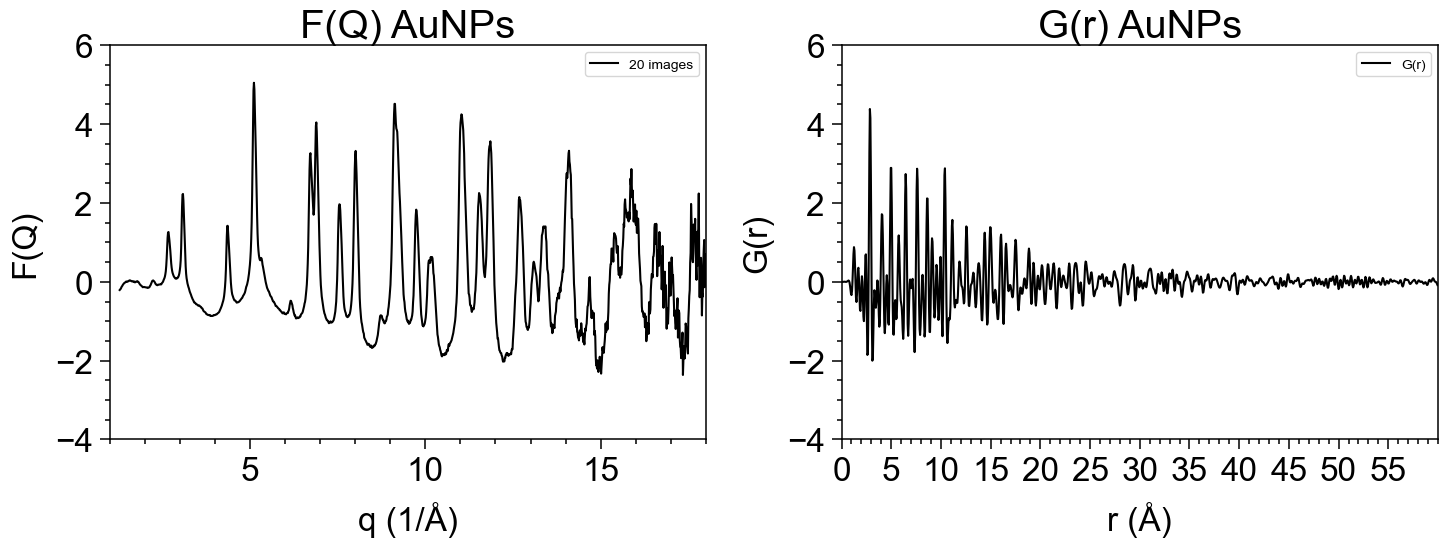

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from mypackages.eRDF import Gr, calc_Gr_Lorch

df = pd.read_csv(r"E:\data_processing\data\raw\ED\In2O3\Results\fq_pca_In2O3_S4.csv", header = 0, sep="\t")



# Calculate G(r)
r, Gr = Gr(dp1.q, fq_poly, rmax=60, dr=0.05)

# Create 2x1 subplot
fig, axs = plt.subplots(1,2, figsize=(15, 6), sharex=False)

# Plot F(Q)
axs[0].plot(dp1.q, fq_poly, label='20 images')
#axs[0].bar(br, i*4, width=0.05)
axs[0].set_xlim(1, 18)
axs[0].set_xlabel('q (1/Å)')
axs[0].set_ylabel('F(Q)')
axs[0].set_title('F(Q) AuNPs')
axs[0].legend(fontsize=10)

# Plot G(r)
axs[1].plot(r, Gr, label='G(r)')
axs[1].set_xlim(0, 60)
axs[1].set_xticks(np.arange(0, 60, 5))
axs[1].set_xlabel('r (Å)')
axs[1].set_ylabel('G(r)')
axs[1].set_title('G(r) AuNPs')
axs[1].legend(fontsize=10)

plt.tight_layout()
plt.show()


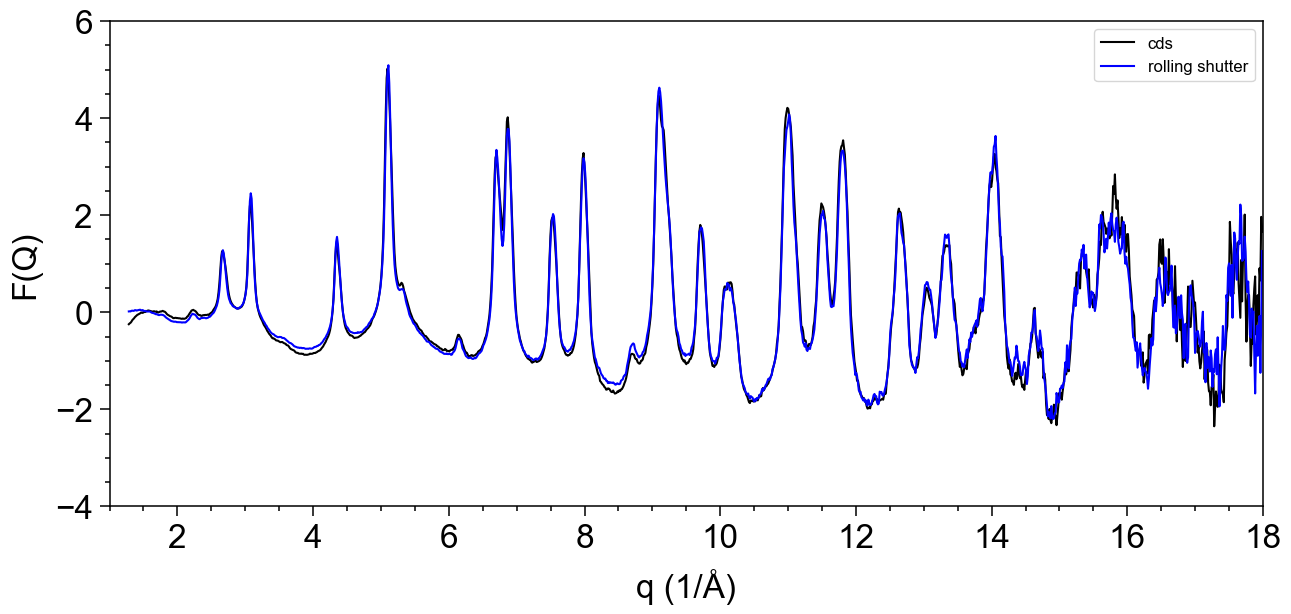

In [31]:
plt.figure(figsize=(15, 6))
plt.plot(dp1.q, fq_poly, label="cds")
plt.plot(q_roll, fq_roll, label="rolling shutter")
plt.xlabel('q (1/Å)')
plt.ylabel('F(Q)')
plt.xlim(1, 18)
plt.legend(fontsize=12)
plt.show()

In [ ]:
q_roll, fq_roll = dp1.q, fq_poly


NameError: name 'q_cmos' is not defined

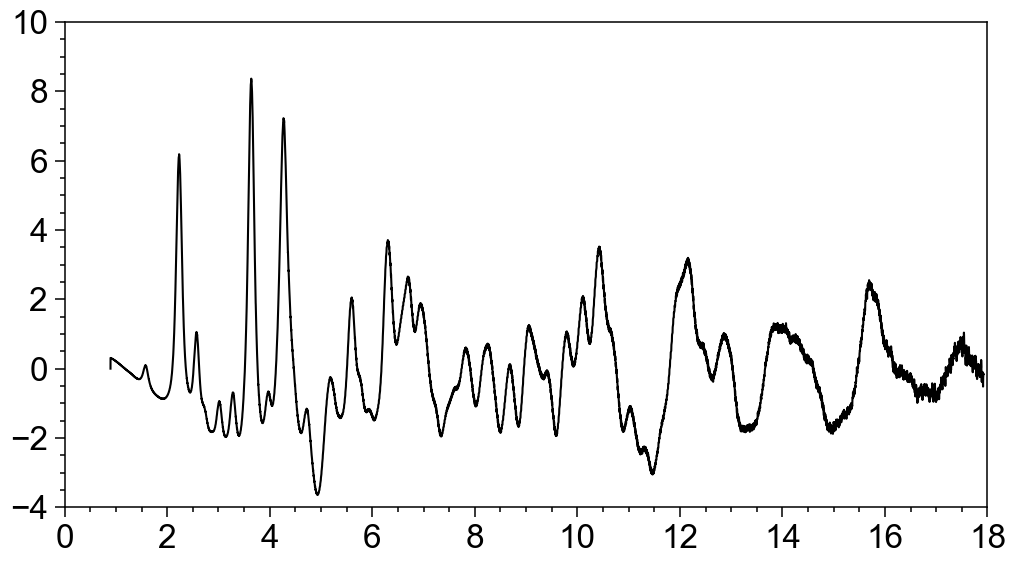

In [57]:
df = pd.read_csv(r"E:\data_processing\data\raw\ED\In2O3\Results\fq_pca_In2O3_S4.csv", header = 0, sep="\t")

plt.figure(figsize=(12, 6))
plt.plot(df["q"], df["fq"], label='CCD 300 kV beamstopper b1 16 s exp spot 1')
plt.plot(q_cmos, fq_cmos*2-15, label ='CMOS 120 kV b2 160s exp spot 4')
plt.xlim(1.5,18)
plt.xlabel('q (1/Å)')
plt.ylabel('F(Q) In2O3')
plt.legend(fontsize=15)
plt.show()

In [ ]:
df = pd.read_csv(r"\\fshomes\seccolev$\Downloads\MnO__1010393.txt", sep=r"[\t ]+", engine="python")

# Reflection intensities
i = df["I"].values / 100  # normalized

# Q from d-spacing
br = 2 * np.pi / df["d(Å)"].values  # same as Q


# Plot
plt.bar(br, i, width=0.05)
plt.xlabel("Q (1/Å)")
plt.ylabel("Weighted Intensity")
plt.title("Weighted Reflection Intensities")
plt.show()